# Imports

In [ ]:
# Import libraries
%matplotlib inline
import csv
from collections import Counter
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns
from datetime import datetime
import warnings

import random
from datetime import datetime, timedelta
from pickle import dump, load
from numpy import loadtxt
from urllib.request import urlopen

# Scikit-learn
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.feature_selection import SelectKBest, chi2, f_classif
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier, DistanceMetric
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.linear_model import LogisticRegression, Perceptron
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, SCORERS
from sklearn.ensemble import VotingClassifier, RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC

# Configs
pd.options.display.max_columns = None
warnings.filterwarnings('ignore')

# Config init

In [ ]:
!pip install kaggle

In [ ]:
# Kaggle API reference: https://github.com/Kaggle/kaggle-api
def import_kaggle_api_key():
  from google.colab import files

  uploaded = files.upload()

  for fn in uploaded.keys():
    print('User uploaded file "{name}" with length {length} bytes'.format(
        name=fn, length=len(uploaded[fn])))
    
  # Then move kaggle.json into the folder where the API expects to find it.
  !mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json
  from kaggle.api.kaggle_api_extended import KaggleApi

def get_data_from_competition():
  # Kaggle competition link
  # https://www.kaggle.com/c/aml-t2-fw/data
  !kaggle competitions download -c aml-t2-fw
  !ls -la ./
  !unzip ./Dados_Teste.csv.zip
  !unzip ./Dados_Treino.csv.zip
  !ls -la ./

In [ ]:
import_kaggle_api_key()

Saving kaggle.json to kaggle.json
User uploaded file "kaggle.json" with length 66 bytes


In [ ]:
get_data_from_competition()

  0% 0.00/114k [00:00<?, ?B/s]
100% 114k/114k [00:00<00:00, 44.5MB/s]
 25% 5.00M/20.3M [00:00<00:00, 27.4MB/s]
100% 20.3M/20.3M [00:00<00:00, 67.4MB/s]
  0% 0.00/2.30M [00:00<?, ?B/s]
100% 2.30M/2.30M [00:00<00:00, 72.7MB/s]
  0% 0.00/28.2k [00:00<?, ?B/s]
100% 28.2k/28.2k [00:00<00:00, 23.8MB/s]
total 23268
drwxr-xr-x 1 root root     4096 Aug  3 15:41 .
drwxr-xr-x 1 root root     4096 Aug  3 15:35 ..
drwxr-xr-x 4 root root     4096 Jul 16 13:19 .config
-rw-r--r-- 1 root root  2410135 Aug  3 15:41 Dados_Teste.csv.zip
-rw-r--r-- 1 root root 21243109 Aug  3 15:41 Dados_Treino.csv.zip
-rw-r--r-- 1 root root    28910 Aug  3 15:41 Dicionario_de_Dados.csv
drwxr-xr-x 1 root root     4096 Jul 16 13:20 sample_data
-rw-r--r-- 1 root root   117176 Aug  3 15:41 Template_Submissao.csv
Archive:  ./Dados_Teste.csv.zip
  inflating: Dados_Teste.csv         
Archive:  ./Dados_Treino.csv.zip
  inflating: Dados_Treino.csv        
total 108712
drwxr-xr-x 1 root root     4096 Aug  3 15:41 .
drwxr-xr-x 1 roo

# Datasets

In [ ]:
df_dados_teste = pd.read_csv('./Dados_Teste.csv')
df_dados_treino = pd.read_csv('./Dados_Treino.csv')
df_dict_dados = pd.read_csv('./Dicionario_de_Dados.csv')
#df_template_sub = pd.read_csv('./Template_Submissao.csv')

In [ ]:
print("Qtde linhas-colunas", df_dados_treino.shape)

Qtde linhas-colunas (117141, 180)


In [ ]:
# Distribuição da variável target
print(Counter(df_dados_treino['diabetes_mellitus']))

Counter({0: 91807, 1: 25334})


In [ ]:
# Mostrar colunas ordenadas
datasetFiltered = df_dados_treino.reindex(sorted(df_dados_treino.columns), axis=1)
#for col in datasetFiltered.columns:
#    print(col)

# classe 0: ausente
# classe 1: presente
print(Counter(df_dados_treino['diabetes_mellitus']))

Counter({0: 91807, 1: 25334})


In [ ]:
# Elimina as observações com valores ausentes
datasetFiltered = datasetFiltered.dropna()
datasetFiltered.describe()

,age,aids,albumin_apache,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,bilirubin_apache,bmi,bun_apache,cirrhosis,creatinine_apache,d1_albumin_max,d1_albumin_min,d1_arterial_pco2_max,d1_arterial_pco2_min,d1_arterial_ph_max,d1_arterial_ph_min,d1_arterial_po2_max,d1_arterial_po2_min,d1_bilirubin_max,d1_bilirubin_min,d1_bun_max,d1_bun_min,d1_calcium_max,d1_calcium_min,d1_creatinine_max,d1_creatinine_min,d1_diasbp_invasive_max,d1_diasbp_invasive_min,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_glucose_max,d1_glucose_min,d1_hco3_max,d1_hco3_min,d1_heartrate_max,d1_heartrate_min,d1_hemaglobin_max,d1_hemaglobin_min,d1_hematocrit_max,d1_hematocrit_min,d1_inr_max,d1_inr_min,d1_lactate_max,d1_lactate_min,d1_mbp_invasive_max,d1_mbp_invasive_min,d1_mbp_max,d1_mbp_min,d1_mbp_noninvasive_max,d1_mbp_noninvasive_min,d1_pao2fio2ratio_max,d1_pao2fio2ratio_min,d1_platelets_max,d1_platelets_min,d1_potassium_max,d1_potassium_min,d1_resprate_max,d1_resprate_min,d1_sodium_max,d1_sodium_min,d1_spo2_max,d1_spo2_min,d1_sysbp_invasive_max,d1_sysbp_invasive_min,d1_sysbp_max,d1_sysbp_min,d1_sysbp_noninvasive_max,d1_sysbp_noninvasive_min,d1_temp_max,d1_temp_min,d1_wbc_max,d1_wbc_min,diabetes_mellitus,elective_surgery,encounter_id,fio2_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,h1_albumin_max,h1_albumin_min,h1_arterial_pco2_max,h1_arterial_pco2_min,h1_arterial_ph_max,h1_arterial_ph_min,h1_arterial_po2_max,h1_arterial_po2_min,h1_bilirubin_max,h1_bilirubin_min,h1_bun_max,h1_bun_min,h1_calcium_max,h1_calcium_min,h1_creatinine_max,h1_creatinine_min,h1_diasbp_invasive_max,h1_diasbp_invasive_min,h1_diasbp_max,h1_diasbp_min,h1_diasbp_noninvasive_max,h1_diasbp_noninvasive_min,h1_glucose_max,h1_glucose_min,h1_hco3_max,h1_hco3_min,h1_heartrate_max,h1_heartrate_min,h1_hemaglobin_max,h1_hemaglobin_min,h1_hematocrit_max,h1_hematocrit_min,h1_inr_max,h1_inr_min,h1_lactate_max,h1_lactate_min,h1_mbp_invasive_max,h1_mbp_invasive_min,h1_mbp_max,h1_mbp_min,h1_mbp_noninvasive_max,h1_mbp_noninvasive_min,h1_pao2fio2ratio_max,h1_pao2fio2ratio_min,h1_platelets_max,h1_platelets_min,h1_potassium_max,h1_potassium_min,h1_resprate_max,h1_resprate_min,h1_sodium_max,h1_sodium_min,h1_spo2_max,h1_spo2_min,h1_sysbp_invasive_max,h1_sysbp_invasive_min,h1_sysbp_max,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,h1_temp_max,h1_temp_min,h1_wbc_max,h1_wbc_min,heart_rate_apache,height,hematocrit_apache,hepatic_failure,hospital_id,icu_id,immunosuppression,intubated_apache,leukemia,lymphoma,map_apache,paco2_apache,paco2_for_ph_apache,pao2_apache,ph_apache,pre_icu_los_days,readmission_status,resprate_apache,sodium_apache,solid_tumor_with_metastasis,temp_apache,urineoutput_apache,ventilated_apache,wbc_apache,weight
count,55.000000,55.0,55.000000,55.000000,55.00000,55.000000,55.0,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.0,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.00000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.00000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.0000

In [ ]:
#checar se existe valores nulos
datasetFiltered.isnull().values.any()

False

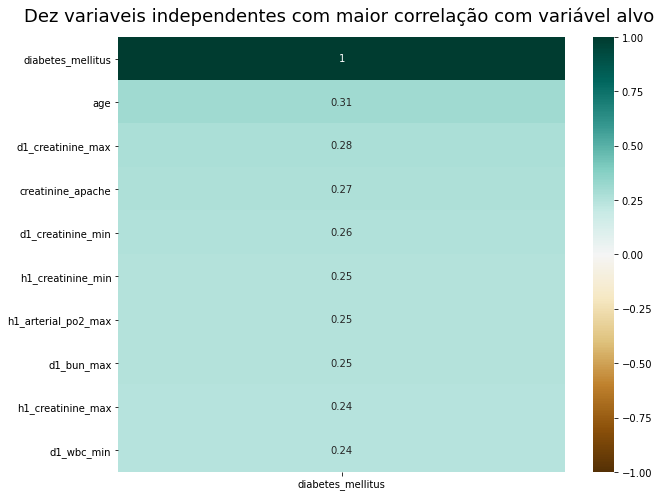

In [ ]:
# Mostrar correlacao de variavei
plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(datasetFiltered.corr()[['diabetes_mellitus']].sort_values(by='diabetes_mellitus', ascending=False).head(10), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Dez variaveis independentes com maior correlação com variável alvo ', fontdict={'fontsize':18}, pad=16);

In [ ]:
# Configura alguns parâmetros
seed = 7
scoring = 'recall'
test_size = 0.25
n_splits = 5
kfold = KFold(n_splits=n_splits, random_state=seed)

In [ ]:
# Extrai a variável target para uma variável específica
featureColumns = ['age', 'd1_creatinine_max', 'creatinine_apache',
                  'd1_creatinine_min', 'h1_creatinine_min', 
                  'h1_arterial_po2_max', 'd1_bun_max', 'h1_creatinine_max',
                  'd1_wbc_min', 'bun_apache', 'h1_mbp_invasive_min', 'h1_diasbp_invasive_min', 
                  'h1_heartrate_min', 'h1_mbp_noninvasive_min', 'h1_mbp_min', 'h1_diasbp_min',
                  'h1_diasbp_noninvasive_min', 'd1_diasbp_invasive_min', 'd1_hco3_min', 'd1_heartrate_max' ]

target = ['diabetes_mellitus']

x = datasetFiltered[featureColumns].values
y = datasetFiltered[target].values

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=100)

ADA: 0.633333 (0.194365) 
GB: 0.666667 (0.278887) 
RF: 0.366667 (0.194365) 
CART: 0.666667 (0.278887) 


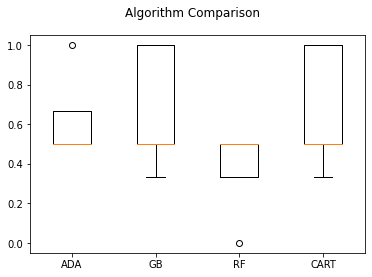

In [ ]:
# Prepara os algoritmos 
models = [] 
models.append(('ADA', AdaBoostClassifier())) 
models.append(('GB', GradientBoostingClassifier())) 
models.append(('RF', RandomForestClassifier())) 
models.append(('CART', DecisionTreeClassifier()))

# Avalia os algoritmos
results = [] 
names = [] 

for name, model in models: 
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring) 
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f) " % (name, cv_results.mean(), cv_results.std()) 
    print(msg)

# Compara os algoritmos
fig = pyplot.figure() 
fig.suptitle('Algorithm Comparison') 
ax = fig.add_subplot(111) 
pyplot.boxplot(results) 
ax.set_xticklabels(names) 
pyplot.show()

In [ ]:
# Cria o modelo base com o melhor algoritmo
baseline = DecisionTreeClassifier(random_state = seed)
baseline.fit(X_train, y_train)

# Verifica a impostância de cada variável no modelo
featureName = pd.DataFrame(datasetFiltered[featureColumns].columns, columns=['Feature'])
featureImp = pd.DataFrame(baseline.feature_importances_, columns=['Imp'])
pd.concat([featureName, featureImp], axis=1)

,Feature,Imp
0,age,0.000000
1,d1_creatinine_max,0.106771
2,creatinine_apache,0.000000
3,d1_creatinine_min,0.257775
4,h1_creatinine_min,0.085417
5,h1_arterial_po2_max,0.000000
6,d1_bun_max,0.142361
7,h1_creatinine_max,0.000000
8,d1_wbc_min,0.407676
9,bun_apache,0.000000


In [ ]:
# Testa contra os dados de teste
predictions = baseline.predict(X_test)
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))



[[8 1]
 [5 0]]
              precision    recall  f1-score   support

           0       0.62      0.89      0.73         9
           1       0.00      0.00      0.00         5

    accuracy                           0.57        14
   macro avg       0.31      0.44      0.36        14
weighted avg       0.40      0.57      0.47        14



In [ ]:
# Salva o modelo em disco
filename = 'modelo' 
dump(baseline, open(filename, 'wb'))

# Regressão Linear

In [ ]:
# Carregando dataset
df_dados_treino = pd.read_csv('./Dados_Treino.csv')

In [ ]:
df_dados_treino.shape

(117141, 180)

In [ ]:
# Elimina as observações com valores ausentes
datasetFiltered = df_dados_treino.dropna()
datasetFiltered.shape

(55, 180)

In [ ]:
datasetFiltered.corr()[['diabetes_mellitus']].sort_values(by='diabetes_mellitus', ascending=False).head(10)

,diabetes_mellitus
diabetes_mellitus,1.000000
age,0.306346
d1_creatinine_max,0.279294
creatinine_apache,0.265883
d1_creatinine_min,0.262189
h1_creatinine_min,0.252595
h1_arterial_po2_max,0.250534
d1_bun_max,0.250419
h1_creatinine_max,0.244502
d1_wbc_min,0.244454


In [ ]:
# Extrai a variável target para uma variável específica
featureColumns = ['age', 'd1_creatinine_max', 'creatinine_apache',
                  'd1_creatinine_min', 'h1_creatinine_min', 
                  'h1_arterial_po2_max', 'd1_bun_max', 'h1_creatinine_max',
                  'd1_wbc_min', 'bun_apache', 'h1_mbp_invasive_min', 'h1_diasbp_invasive_min', 
                  'h1_heartrate_min', 'h1_mbp_noninvasive_min', 'h1_mbp_min', 'h1_diasbp_min',
                  'h1_diasbp_noninvasive_min', 'd1_diasbp_invasive_min', 'd1_hco3_min', 'd1_heartrate_max' ]

target = ['diabetes_mellitus']

x = datasetFiltered[featureColumns].values
y = datasetFiltered[target].values

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=100)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

modelo = LinearRegression()

In [ ]:
modelo.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
print('score = ',(modelo.score(X_train, y_train).round(2)))

score =  0.69


# Regressao Linear - 10 variaveis mais corelacionadas 

In [ ]:
# Carregando dataset
df_dados_treino = pd.read_csv('./Dados_Treino.csv')

# Elimina as observações com valores ausentes
datasetFiltered = df_dados_treino.dropna()

In [ ]:
# Extrai a variável target para uma variável específica
featureColumns = ['age', 'd1_creatinine_max', 'creatinine_apache',
                  'd1_creatinine_min', 'h1_creatinine_min', 
                  'h1_arterial_po2_max', 'd1_bun_max', 'h1_creatinine_max',
                  'd1_wbc_min', 'bun_apache']

target = ['diabetes_mellitus']

x = datasetFiltered[featureColumns].values
y = datasetFiltered[target].values

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=100)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

modelo = LinearRegression()

modelo.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
print('score = ',(modelo.score(X_train, y_train).round(2)))

score =  0.53


# Regressão Linear - PCA

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.decomposition import PCA

In [ ]:
# Carregando dataset
df_dados_treino = pd.read_csv('./Dados_Treino.csv')

In [ ]:
# Elimina as observações com valores ausentes
datasetFiltered = df_dados_treino.dropna()
datasetFiltered.shape

(55, 180)

In [ ]:
X = datasetFiltered.values

pca = PCA(n_components=1)
pca.fit(X)

X_pca = pca.transform(X)
print("original shape:   ", X.shape)
print("transformed shape:", X_pca.shape)

ValueError: ignored